# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargar los datos en la variable datos
customer_data = pd.read_csv('Mall_Customers.csv')

In [6]:
# Realizamos lectura de los Datos para el análisis exploratorio
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# número de filas y columnas
customer_data.shape

(200, 5)

In [10]:
# información general sobre el conjunto de datos
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# Identifacion de valores faltantes
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

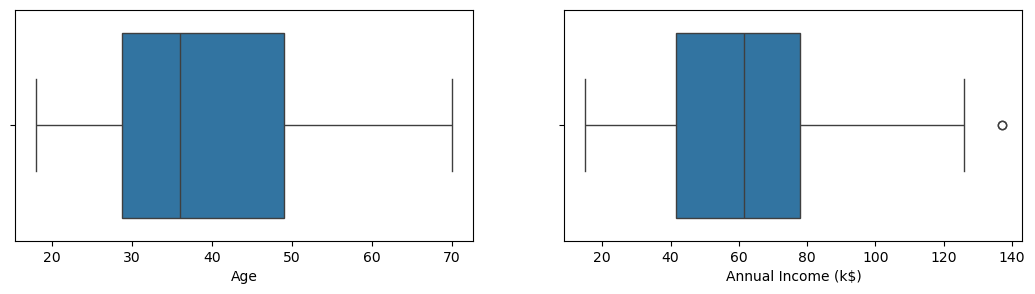

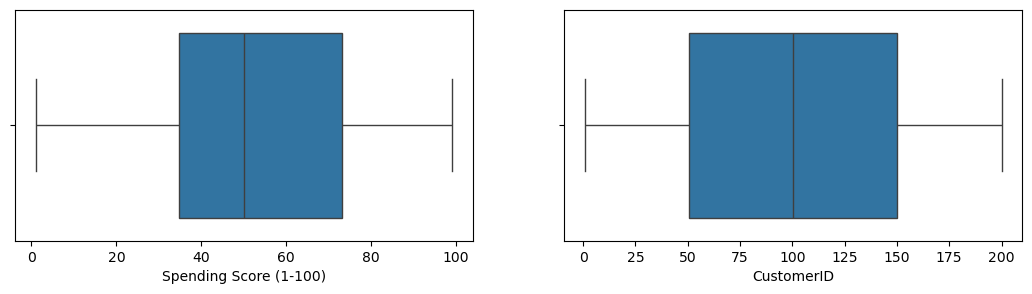

In [14]:
# Boxplots para detectar outliers en columnas numericas
num_cols = ['Age','Annual Income (k$)','Spending Score (1-100)', 'CustomerID']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=customer_data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=customer_data)
    i += 1
    
    plt.show()

# Preprocesamiento de datos y seleccion de caracteristicas

Características de interes para el agrupamiento: 
- Ingresos anuales 
- Puntuación de gastos

In [18]:
customer_data = customer_data[['Annual Income (k$)','Spending Score (1-100)']]
customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
# escalar nuestros datos 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(customer_data), columns = customer_data.columns)

# Mostrar los datos escalonados 
customer_data = scaled_data
customer_data

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [34]:
# elegir los valores de la columna de ingresos anuales y la columna de puntuación de gastos y guardalos en la variable X
X = customer_data.iloc[:,[0,1]].values
print(X)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


# Entrenar el modelo configurando los diferentes hiperparámetros

In [25]:
# Encontrar el valor wcss para diferentes cantidades de clústeres

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

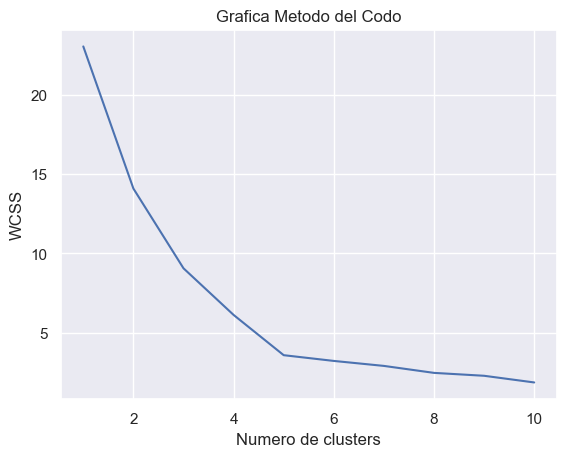

In [26]:
# Grafica de codo para la seleccion de "k"

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Grafica Metodo del Codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# devuelve una etiqueta para cada punto de datos en función de su grupo
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


# Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [32]:
Observaciones = len(X)

# Se calculan las métricas
sil_score = silhouette_score(X, Y)
calinski_score = calinski_harabasz_score(X, Y)
davies_score = davies_bouldin_score(X, Y)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.5594854531227246 |
| Indice Calinski Harabasz | 264.72980875215904 |
|  Indice Davies Bouldin   | 0.5678112087671997 |
+--------------------------+--------------------+


# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

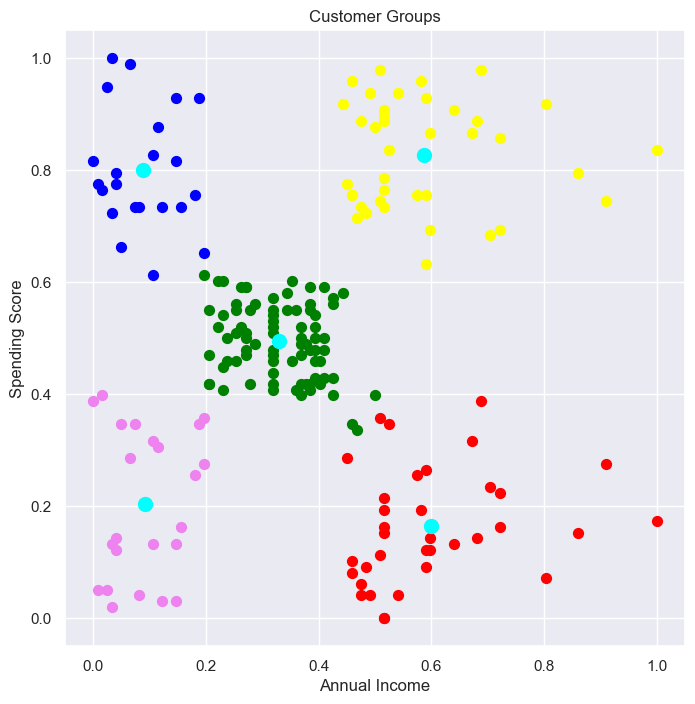

In [40]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- Coeficiente Silhouette: La puntuación de Silhouette obtenida es de aproximadamente 0.559. Aunque este valor no se acerca completamente a 1, lo que sería ideal, aún indica una buena separación entre los grupos. Un valor cercano a 0.6 sugiere que los grupos son razonablemente distintos entre sí, aunque es posible que exista cierta superposición leve entre algunos de ellos. En términos generales, una puntuación de Silhouette más alta (cercana a 1) sería deseable, ya que indicaría que los puntos dentro de un cluster están mucho más próximos entre sí que a puntos de otros clusters, representando una mayor cohesión interna y separación entre los grupos.
  
- Índice Calinski-Harabasz: La puntuación de Calinski-Harabasz obtenida es de 264.72, un valor considerablemente alto que sugiere que los clusters están bien definidos y estructurados. En general, una puntuación elevada en esta métrica indica que los clusters no solo tienen una buena cohesión interna, sino que también están bien separados entre sí. Esto implica que la segmentación ha capturado una estructura significativa en los datos, lo cual es un buen indicativo de que la agrupación ha sido eficaz.
  
- Índice Davies-Bouldin: El Índice Davies-Bouldin obtenido es de 0.568, lo cual representa una puntuación razonable y sugiere un nivel moderado de similitud entre cada grupo y su cluster más cercano. En esta métrica, los valores más bajos son preferibles, ya que indican menor similitud entre los clusters y, por lo tanto, una mejor separación. En general, este índice respalda que la agrupación realizada es adecuada, proporcionando una estructura válida para segmentaciones prácticas, como en el análisis de perfiles de clientes.
